#  GeoPandas and open data buffalo

If you go to Open Data Buffalo,  got to Data or  set the Authority to Official and type to Maps

Browsing, you will see a lot of interesting data,  below are links to a number of handy things


## Links to many useful maps in the Open Data Buffalo Site

https://data.buffalony.gov/Economic-Neighborhood-Development/Neighborhoods/7bfh-7wq9

https://data.buffalony.gov/Economic-Neighborhood-Development/Neighborhoods/7bfh-7wq9

https://data.buffalony.gov/Infrastructure/Highways-and-Roadways/gkc8-ifg7

https://data.buffalony.gov/Government/Census-Tracts-2020/nwaf-5f77

https://data.buffalony.gov/Public-Safety/BPD-Cameras/egev-8jf4

https://data.buffalony.gov/Economic-Neighborhood-Development/Opportunity-Zones-2021/vuui-wurg

https://data.buffalony.gov/Government/Zip-Codes/cys8-ihgs

In [3]:
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# load the Buffalo Street map and plot it

In [5]:
infile="/content/drive/MyDrive/Colab Notebooks/Spring 2024/DAT_512-Stat.-Approaches-to-Big-Data/Data/Highways_and_Roadways.csv"

roads=pd.read_csv(infile)
roads.head()

the_geom  OBJECTID  NYSStreetID  \
0  MULTILINESTRING ((-78.862643159841 42.93182848...      4760  600058501.0   
1  MULTILINESTRING ((-78.845214165985 42.87086246...     10718  477797294.0   
2  MULTILINESTRING ((-78.827217182418 42.86574050...     11117  477798597.0   
3  MULTILINESTRING ((-78.804619308533 42.86063097...       557  477799268.0   
4  MULTILINESTRING ((-78.868159186902 42.94568050...      3403  477776677.0   

   LeftFromAddress  LeftToAddress  RightFromAddress  RightToAddress  \
0              NaN            NaN               NaN             NaN   
1            316.0          370.0             317.0           369.0   
2             22.0           98.0              23.0            99.0   
3            248.0          308.0               NaN             NaN   
4             98.0           98.0              99.0            99.0   

     CompleteStreetName HighwayNumber  Jurisdiction  FCC  ACC  SPEED  \
0        Unnamed Street           NaN          14.0  A70  6.0   15.0   
1          Smith Street           NaN          12.0  A31  4.0   35.0   
2       James P Coppola           NaN          12.0  A30  4.0   35.0   
3  Mineral Springs Road           NaN          12.0  A35  4.0   35.0   
4          Tioga Street           NaN          12.0  A41  5.0   25.0   

   LeftPostal  RightPostal  Shape.STLength()  
0     14214.0      14214.0         97.321472  
1     14210.0      14210.0         90.442701  
2     14210.0      14210.0        205.953960  
3     14210.0      14210.0        162.831183  
4     14216.0      14216.0          4.250600

In [6]:
# this looks like a GeoPandas ready file, since there is a column with the title "the_geom"
# the loading functions in GeoPandas claim to be pretty good,  able to load many types of geographic information file
# so let's try a direct load into a GeoPandas data frame

roads2=geopandas.read_file(infile)

In [7]:
type(roads2)

geopandas.geodataframe.GeoDataFrame

In [8]:
# that was almost too easy...

roads2.head()

the_geom OBJECTID NYSStreetID  \
0  MULTILINESTRING ((-78.862643159841 42.93182848...     4760   600058501   
1  MULTILINESTRING ((-78.845214165985 42.87086246...    10718   477797294   
2  MULTILINESTRING ((-78.827217182418 42.86574050...    11117   477798597   
3  MULTILINESTRING ((-78.804619308533 42.86063097...      557   477799268   
4  MULTILINESTRING ((-78.868159186902 42.94568050...     3403   477776677   

  LeftFromAddress LeftToAddress RightFromAddress RightToAddress  \
0                                                                 
1             316           370              317            369   
2              22            98               23             99   
3             248           308                                   
4              98            98               99             99   

     CompleteStreetName HighwayNumber Jurisdiction  FCC ACC SPEED LeftPostal  \
0        Unnamed Street                         14  A70   6    15      14214   
1          Smith Street                         12  A31   4    35      14210   
2       James P Coppola                         12  A30   4    35      14210   
3  Mineral Springs Road                         12  A35   4    35      14210   
4          Tioga Street                         12  A41   5    25      14216   

  RightPostal    Shape.STLength() geometry  
0       14214     97.321471927093     None  
1       14210  90.442700644886571     None  
2       14210  205.95396010793684     None  
3       14210  162.83118260894148     None  
4       14216   4.250599957696331     None

In [9]:
roads2.dtypes

the_geom                object
OBJECTID                object
NYSStreetID             object
LeftFromAddress         object
LeftToAddress           object
RightFromAddress        object
RightToAddress          object
CompleteStreetName      object
HighwayNumber           object
Jurisdiction            object
FCC                     object
ACC                     object
SPEED                   object
LeftPostal              object
RightPostal             object
Shape.STLength()        object
geometry              geometry
dtype: object

# okay, right now we have a geopandas data frame, but it has no "geometry" data type

It turns out the the data colum called "the_geom" is a WKS format encoding, which we have to converst

In [10]:
roads2['geometry'] = geopandas.GeoSeries.from_wkt(roads2['the_geom'])

#my_geo_df = gpd.GeoDataFrame(my_df, geometry='geometry')

In [11]:
roads2.head()

the_geom OBJECTID NYSStreetID  \
0  MULTILINESTRING ((-78.862643159841 42.93182848...     4760   600058501   
1  MULTILINESTRING ((-78.845214165985 42.87086246...    10718   477797294   
2  MULTILINESTRING ((-78.827217182418 42.86574050...    11117   477798597   
3  MULTILINESTRING ((-78.804619308533 42.86063097...      557   477799268   
4  MULTILINESTRING ((-78.868159186902 42.94568050...     3403   477776677   

  LeftFromAddress LeftToAddress RightFromAddress RightToAddress  \
0                                                                 
1             316           370              317            369   
2              22            98               23             99   
3             248           308                                   
4              98            98               99             99   

     CompleteStreetName HighwayNumber Jurisdiction  FCC ACC SPEED LeftPostal  \
0        Unnamed Street                         14  A70   6    15      14214   
1          Smith Street                         12  A31   4    35      14210   
2       James P Coppola                         12  A30   4    35      14210   
3  Mineral Springs Road                         12  A35   4    35      14210   
4          Tioga Street                         12  A41   5    25      14216   

  RightPostal    Shape.STLength()  \
0       14214     97.321471927093   
1       14210  90.442700644886571   
2       14210  205.95396010793684   
3       14210  162.83118260894148   
4       14216   4.250599957696331   

                                            geometry  
0  MULTILINESTRING ((-78.86264 42.93183, -78.8628...  
1  MULTILINESTRING ((-78.84521 42.87086, -78.8449...  
2  MULTILINESTRING ((-78.82722 42.86574, -78.8270...  
3  MULTILINESTRING ((-78.80462 42.86063, -78.8034...  
4  MULTILINESTRING ((-78.86816 42.94568, -78.8682...

In [12]:
#hmm, no CRS is set, we'll have to fix that
roads2.crs

In [13]:
# set the CRS,  these are street coordinates in Lat and Long, so use EPSG:4326

roads2=roads2.set_crs('epsg:4326')

roads2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

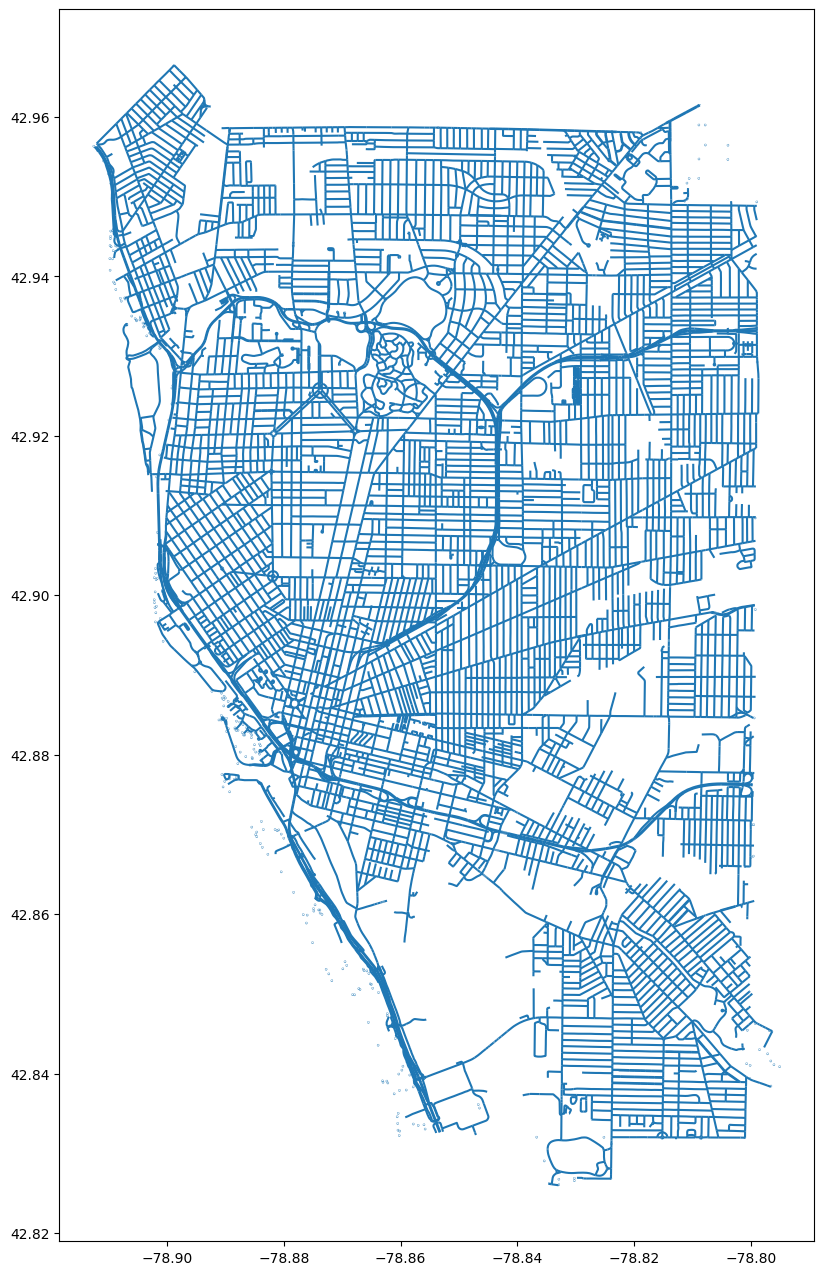

In [14]:
# let's get a plot of this thing
roads2.plot(figsize=(16,16))

 Note that "under the hood" GeoPandas is using matplotlib to do the plotting,  we should be able to use Matplotlib to add things to a plot, lets try that


Text(-78.9, 42.84, 'Bflo')

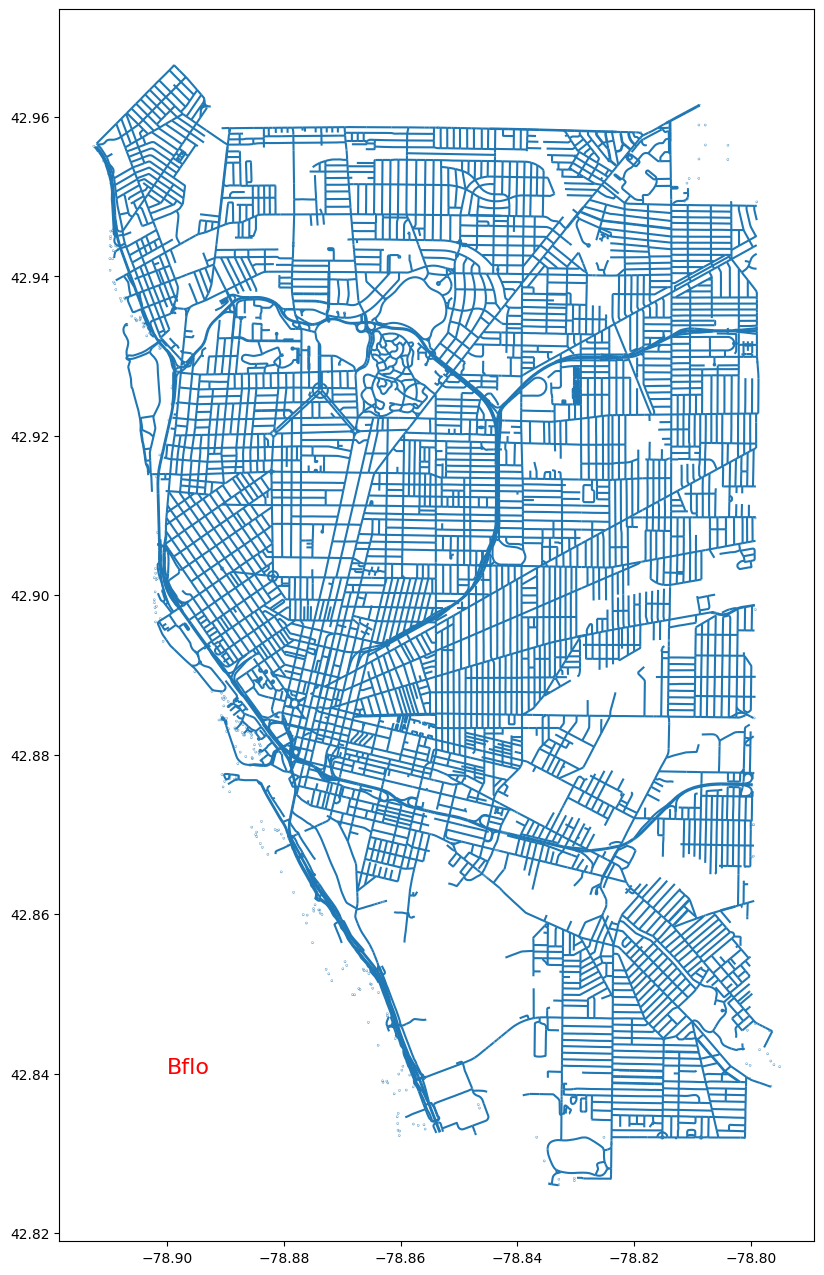

In [20]:
# Matplotlib has a text function that allows us to place text at a desired (x,y) location
# see:  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html#matplotlib.pyplot.text
# for more info on the text function

# here is a simple operation of this

ax=roads2.plot(figsize=(16,16))

plt.text(x=-78.9, y=42.84, s="Bflo",color='red',fontsize=16)


In [21]:
# lets get the neighborhoods definitions and over plot these on the city map

inf_nbhoods="/content/drive/MyDrive/Colab Notebooks/Spring 2024/DAT_512-Stat.-Approaches-to-Big-Data/Data/Neighborhoods.csv"

nbhoods=geopandas.read_file(inf_nbhoods)

nbhoods.head()

Neighborhood Name Neighborhood Number           CalcAcres     SqMiles  \
0   Lower West Side                   2  359.93654935000001  0.56240086   
1          Kenfield                  18  449.51229339000002  0.70236296   
2         West Side                   4  568.54745433999994   0.8883554   
3    Elmwood Bryant                   5  543.31010802000003  0.84892204   
4        First Ward                  26  482.61876506999999  0.75409182   

  OBJECTID                                           Geometry geometry  
0       23  MULTIPOLYGON (((-78.890337163091 42.8905595028...     None  
1        7  MULTIPOLYGON (((-78.799123281835 42.9227930756...     None  
2       21  MULTIPOLYGON (((-78.896392391409 42.8968061177...     None  
3       22  MULTIPOLYGON (((-78.870239649606 42.9154148867...     None  
4       28  MULTIPOLYGON (((-78.84818159001 42.86033454651...     None

In [22]:
nbhoods['geometry']=geopandas.GeoSeries.from_wkt(nbhoods['Geometry'])

<Axes: >

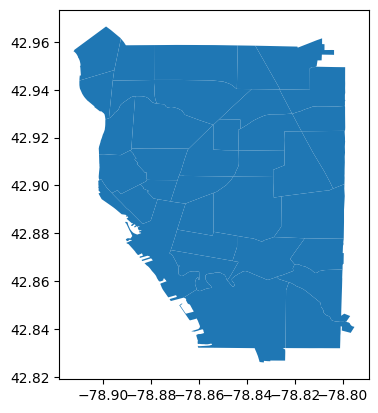

In [23]:
nbhoods.plot()

<Axes: >

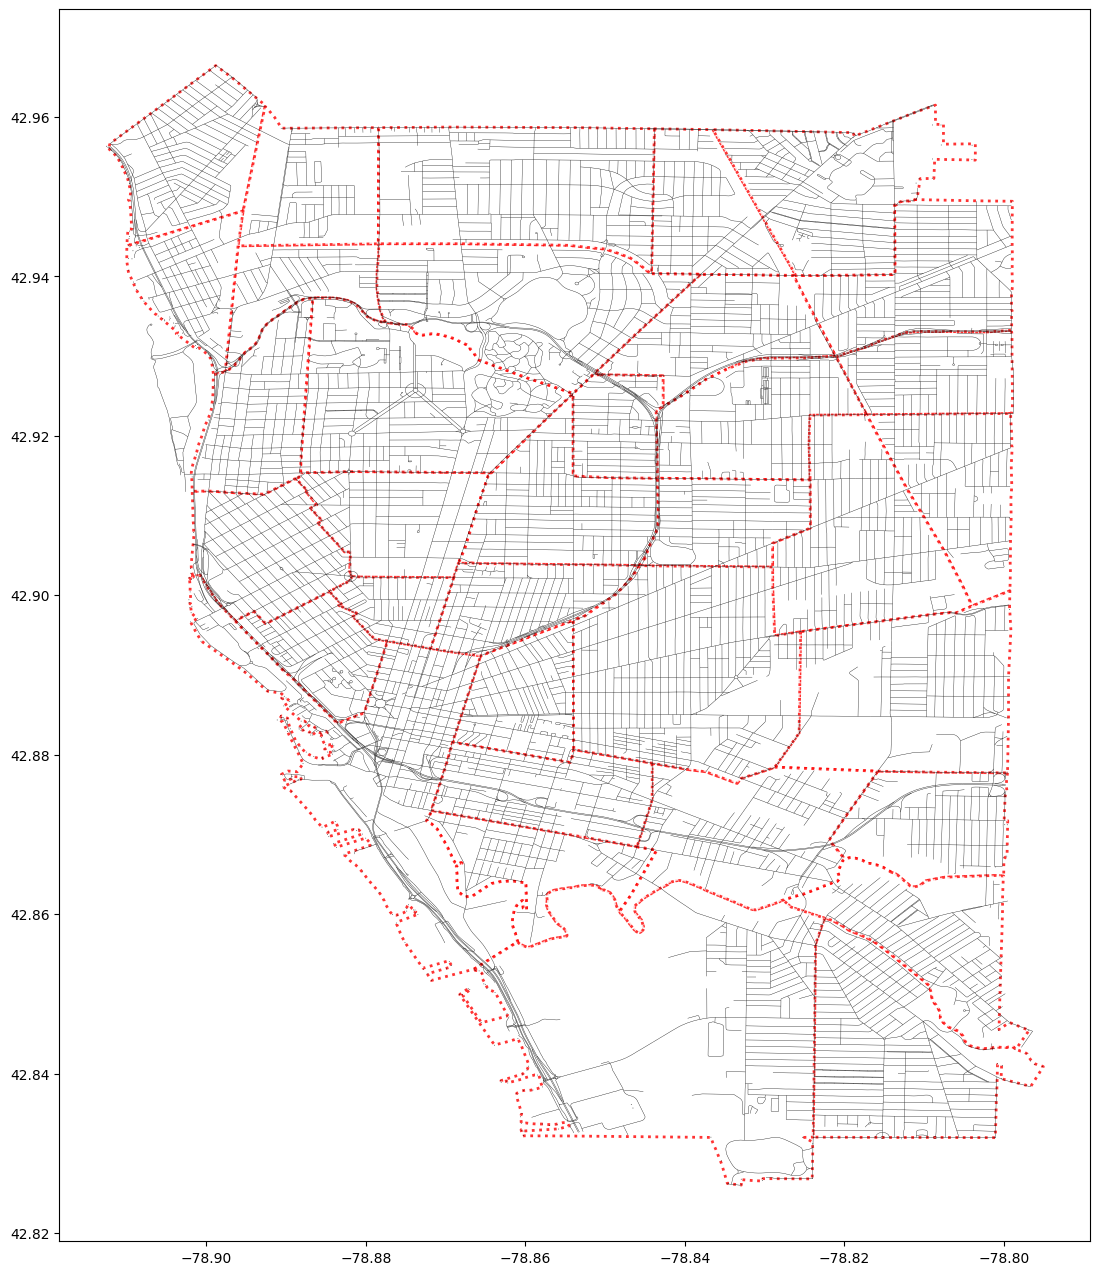

In [24]:
# plot the neighboorhoods as slightly transparent
# it took me a while to figure out how to make the edgecolor controllable...

# alpha is the degree of transparency of the plot

# changing the order of the plot layering changes the look of the resulting map quite a bit
# altering the linewidth also alters the look of the map quite a bit

ax=roads2.plot( color='k',figsize=(16,16),linewidth=0.25)

nbhoods.plot(ax=ax, alpha=.8,color='w',linewidth=2,figsize=(16,16),edgecolor='red',linestyle=":")


## Question/Action

Get the data on Police Precinct boundaries and add it to the map above, showing precinct boundaries in Green

In [26]:
inf_police ="/content/drive/MyDrive/Colab Notebooks/Spring 2024/DAT_512-Stat.-Approaches-to-Big-Data/Data/Police_Districts.csv"

police=geopandas.read_file(inf_police)

police.head()

District Name OBJECTID                                           Geometry  \
0    District C        4  MULTIPOLYGON (((-78.837627146565 42.8788375139...   
1    District D        5  MULTIPOLYGON (((-78.901723381735 42.9151910263...   
2    District A        1  MULTIPOLYGON (((-78.838387137024 42.8320755328...   
3    District E        2  MULTIPOLYGON (((-78.831683101431 42.9459804761...   
4    District B        3  MULTIPOLYGON (((-78.901972526359 42.8966647919...   

  geometry  
0     None  
1     None  
2     None  
3     None  
4     None

<Axes: >

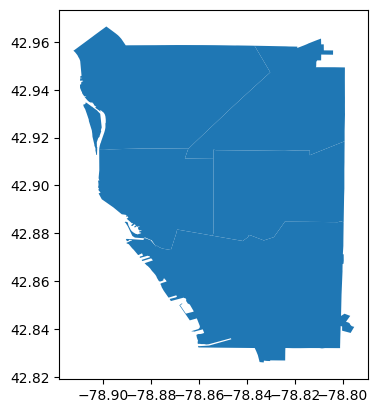

In [30]:
police['geometry']=geopandas.GeoSeries.from_wkt(police['Geometry'])
police.plot()

<Axes: >

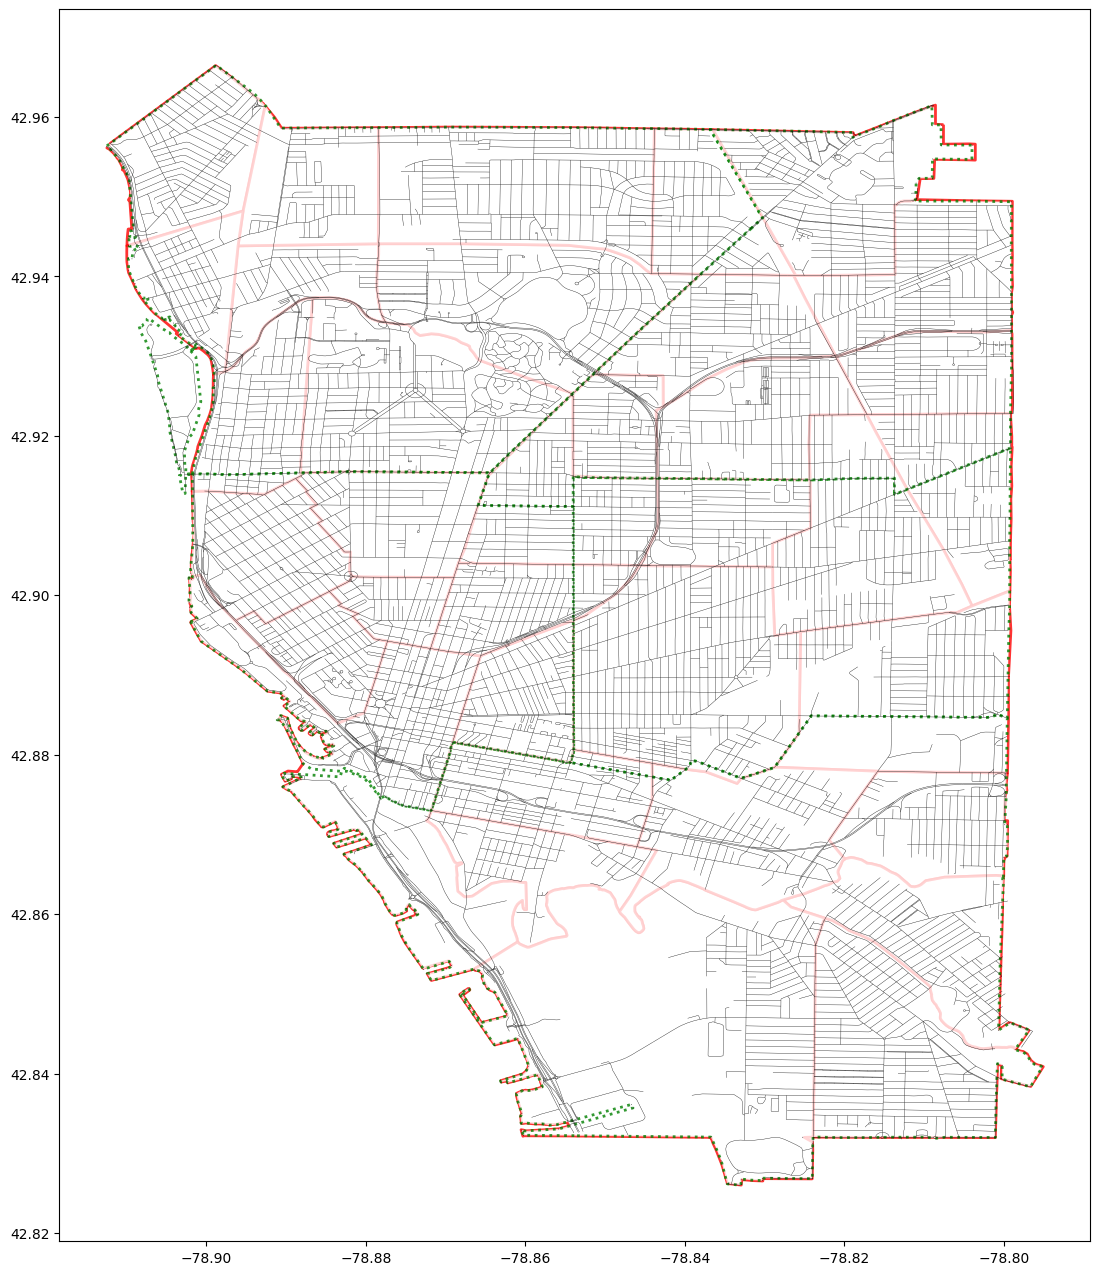

In [31]:
ax=roads2.plot( color='k',figsize=(16,16),linewidth=0.25)

nbhoods.plot(ax=ax, alpha=.8,color='w',linewidth=2,figsize=(16,16),edgecolor='red',linestyle="-")
police.plot(ax=ax, alpha=.8,color='w',linewidth=2,figsize=(16,16),edgecolor='green',linestyle=":")


## Question/Action

Plot the census blocks outlines over the City of Buffalo

In [33]:
inf_census ="/content/drive/MyDrive/Colab Notebooks/Spring 2024/DAT_512-Stat.-Approaches-to-Big-Data/Data/Census_Tracts_2020.csv"

census=geopandas.read_file(inf_census)

census.head()

STATEFP20 COUNTYFP20 TRACTCE20      GEOID20 NAME20    NAMELSAD20 MTFCC20  \
0        36        029    004003  36029004003  40.03  Census Tract   G5020   
1        36        029    000900  36029000900      9  Census Tract   G5020   
2        36        029    003501  36029003501  35.01  Census Tract   G5020   
3        36        029    005500  36029005500     55  Census Tract   G5020   
4        36        029    004901  36029004901  49.01  Census Tract   G5020   

  FUNCSTAT20  ALAND20 AWATER20   INTPTLAT20    INTPTLON20  \
0          S   890101        0  +42.9354233  -078.8338819   
1          S   549188        0  +42.8539069  -078.8165216   
2          S   680915        0  +42.9088219  -078.8294903   
3          S  1559835        0  +42.9388805  -078.8889408   
4          S   258659        0  +42.9457704  -078.8601229   

                                            the_geom OBJECTID geometry  
0  MULTIPOLYGON (((-78.83926514923 42.93133848177...       37     None  
1  MULTIPOLYGON (((-78.823623137997 42.8563174690...        7     None  
2  MULTIPOLYGON (((-78.835842145396 42.9037854770...       30     None  
3  MULTIPOLYGON (((-78.898815168213 42.9364124801...       56     None  
4  MULTIPOLYGON (((-78.868149159609 42.9446304824...       48     None

<Axes: >

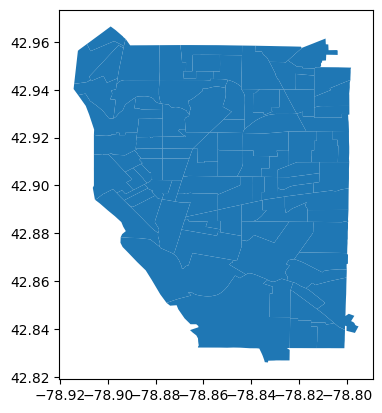

In [34]:
census['geometry']=geopandas.GeoSeries.from_wkt(census['the_geom'])
census.plot()

<Axes: >

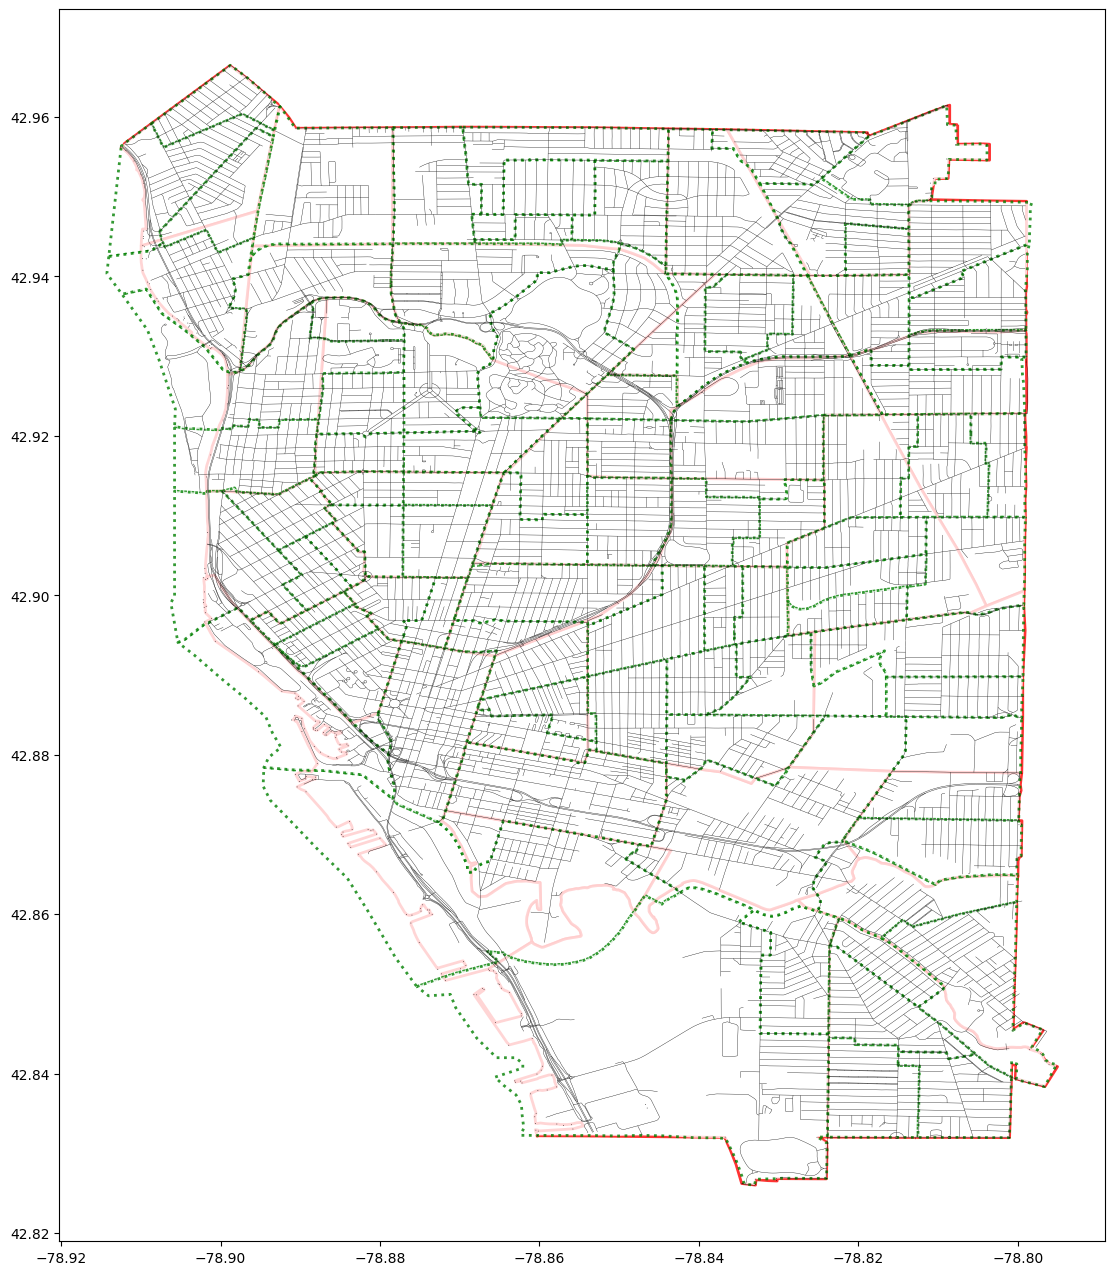

In [35]:
ax=roads2.plot( color='k',figsize=(16,16),linewidth=0.25)

nbhoods.plot(ax=ax, alpha=.8,color='w',linewidth=2,figsize=(16,16),edgecolor='red',linestyle="-")
census.plot(ax=ax, alpha=.8,color='w',linewidth=2,figsize=(16,16),edgecolor='green',linestyle=":")


## Question/Action

Find the centroid of each neighorhood,   storing it in the nbhoods data frame.

Create a map of the city of Buffalo, with the neighborhood boundaries shown and the centroids of each boundary visible

In [38]:
nbhoods['centroid']=nbhoods.centroid
nbhoods.head()

Neighborhood Name Neighborhood Number           CalcAcres     SqMiles  \
0   Lower West Side                   2  359.93654935000001  0.56240086   
1          Kenfield                  18  449.51229339000002  0.70236296   
2         West Side                   4  568.54745433999994   0.8883554   
3    Elmwood Bryant                   5  543.31010802000003  0.84892204   
4        First Ward                  26  482.61876506999999  0.75409182   

  OBJECTID                                           Geometry  \
0       23  MULTIPOLYGON (((-78.890337163091 42.8905595028...   
1        7  MULTIPOLYGON (((-78.799123281835 42.9227930756...   
2       21  MULTIPOLYGON (((-78.896392391409 42.8968061177...   
3       22  MULTIPOLYGON (((-78.870239649606 42.9154148867...   
4       28  MULTIPOLYGON (((-78.84818159001 42.86033454651...   

                                            geometry  \
0  MULTIPOLYGON (((-78.89034 42.89056, -78.89257 ...   
1  MULTIPOLYGON (((-78.79912 42.92279, -78.79915 ...   
2  MULTIPOLYGON (((-78.89639 42.89681, -78.89780 ...   
3  MULTIPOLYGON (((-78.87024 42.91541, -78.86998 ...   
4  MULTIPOLYGON (((-78.84818 42.86033, -78.84820 ...   

                     centroid  
0  POINT (-78.88538 42.89270)  
1  POINT (-78.80876 42.92779)  
2  POINT (-78.89269 42.90554)  
3  POINT (-78.87598 42.90957)  
4  POINT (-78.85847 42.86597)

<Axes: >

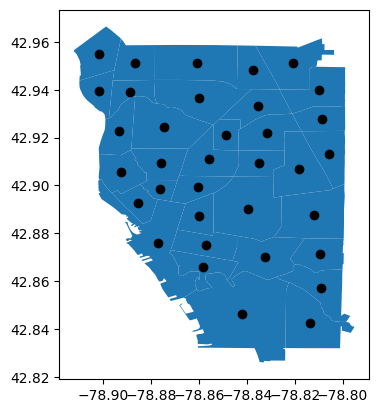

In [39]:
ax = nbhoods["geometry"].plot()
nbhoods["centroid"].plot(ax=ax, color="black")

## Question/Action

Modify the plot you created above, so that instead of showing the centroid, you print the name of the neighborhood at the location of the centroid

In [40]:
nbhoods.head()

Neighborhood Name Neighborhood Number           CalcAcres     SqMiles  \
0   Lower West Side                   2  359.93654935000001  0.56240086   
1          Kenfield                  18  449.51229339000002  0.70236296   
2         West Side                   4  568.54745433999994   0.8883554   
3    Elmwood Bryant                   5  543.31010802000003  0.84892204   
4        First Ward                  26  482.61876506999999  0.75409182   

  OBJECTID                                           Geometry  \
0       23  MULTIPOLYGON (((-78.890337163091 42.8905595028...   
1        7  MULTIPOLYGON (((-78.799123281835 42.9227930756...   
2       21  MULTIPOLYGON (((-78.896392391409 42.8968061177...   
3       22  MULTIPOLYGON (((-78.870239649606 42.9154148867...   
4       28  MULTIPOLYGON (((-78.84818159001 42.86033454651...   

                                            geometry  \
0  MULTIPOLYGON (((-78.89034 42.89056, -78.89257 ...   
1  MULTIPOLYGON (((-78.79912 42.92279, -78.79915 ...   
2  MULTIPOLYGON (((-78.89639 42.89681, -78.89780 ...   
3  MULTIPOLYGON (((-78.87024 42.91541, -78.86998 ...   
4  MULTIPOLYGON (((-78.84818 42.86033, -78.84820 ...   

                     centroid  
0  POINT (-78.88538 42.89270)  
1  POINT (-78.80876 42.92779)  
2  POINT (-78.89269 42.90554)  
3  POINT (-78.87598 42.90957)  
4  POINT (-78.85847 42.86597)

<Figure size 2000x2000 with 0 Axes>

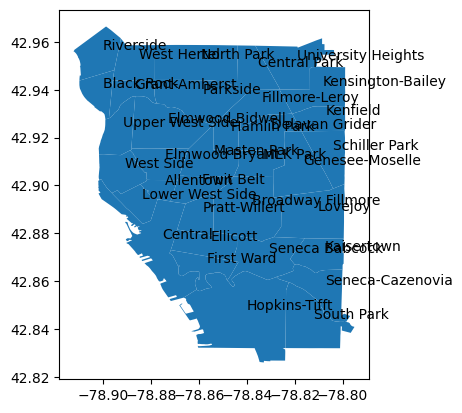

In [45]:
nbhoods.plot()

# Add neighborhood names at centroid locations
for idx, row in nbhoods.iterrows():
    plt.annotate(text=row['Neighborhood Name'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 xytext=(3, 3), textcoords="offset points")

plt.show()


## Question/Action

Get the tree inventory and plot it on top of the map of Buffalo

In [55]:
inf_tree ="/content/drive/MyDrive/Colab Notebooks/Spring 2024/DAT_512-Stat.-Approaches-to-Big-Data/Data/Tree_Inventory_20240305.csv"

tree=geopandas.read_file(inf_tree)
tree['Latitude'] = tree['Latitude'].astype(float)
tree = tree[tree['Latitude']>10]
tree.head()

Editing Botanical Name Common Name DBH Total Yearly Eco Benefits ($)  \
0  Buffalo         VACANT      VACANT   0                             0   
1  Buffalo         VACANT      VACANT   0                             0   
2  Buffalo         VACANT      VACANT   0                             0   
3  Buffalo         VACANT      VACANT   0                             0   
4  Buffalo         VACANT      VACANT   0                             0   

  Stormwater Benefits ($) Stormwater Gallons Saved  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   

  Greenhouse CO2 Benefits ($) CO2 Avoided (in lbs.) CO2 Sequestered (in lbs.)  \
0                           0                     0                         0   
1                           0                     0                         0   
2                           0                     0                         0   
3                           0                     0                         0   
4                           0                     0                         0   

   ...   Side Site Council District Park Name   Latitude          Longitude  \
0  ...  Front    1         Delaware         0  42.944564     -78.8537781977   
1  ...   Side    1         Delaware         0  42.938299  -78.8493548021878   
2  ...  Front    1         Delaware         0  42.957930  -78.8449448025202   
3  ...  Front    1         Delaware         0  42.946482     -78.8325596768   
4  ...  Front    1         Ellicott         0  42.909637  -78.8481499390883   

  Site ID                               Location  \
0   58174        (42.9445636713, -78.8537781977)   
1   58666  (42.9382988357101, -78.8493548021878)   
2   61166  (42.9579302587484, -78.8449448025202)   
3   66853        (42.9464824572, -78.8325596768)   
4    9939  (42.9096368144715, -78.8481499390883)   

                                     location geometry  
0        POINT (-78.8537781977 42.9445636713)     None  
1  POINT (-78.8493548021878 42.9382988357101)     None  
2  POINT (-78.8449448025202 42.9579302587484)     None  
3        POINT (-78.8325596768 42.9464824572)     None  
4  POINT (-78.8481499390883 42.9096368144715)     None  

[5 rows x 29 columns]

<Axes: >

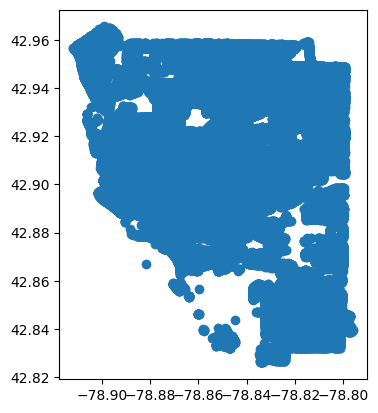

In [56]:
tree['geometry']=geopandas.GeoSeries.from_wkt(tree['location'])
tree.plot()

In [58]:
ax=roads2.plot( color='k',figsize=(16,16),linewidth=0.25)

tree.plot(ax=ax, alpha=.8,color='w',linewidth=2,figsize=(16,16),edgecolor='green',linestyle=":")


Output hidden; open in https://colab.research.google.com to view.

## Question/Action

Pick one particular neighborhood,  how could you figure out how many trees are in that neighborhood?

In [59]:
nbhoods.head()

Neighborhood Name Neighborhood Number           CalcAcres     SqMiles  \
0   Lower West Side                   2  359.93654935000001  0.56240086   
1          Kenfield                  18  449.51229339000002  0.70236296   
2         West Side                   4  568.54745433999994   0.8883554   
3    Elmwood Bryant                   5  543.31010802000003  0.84892204   
4        First Ward                  26  482.61876506999999  0.75409182   

  OBJECTID                                           Geometry  \
0       23  MULTIPOLYGON (((-78.890337163091 42.8905595028...   
1        7  MULTIPOLYGON (((-78.799123281835 42.9227930756...   
2       21  MULTIPOLYGON (((-78.896392391409 42.8968061177...   
3       22  MULTIPOLYGON (((-78.870239649606 42.9154148867...   
4       28  MULTIPOLYGON (((-78.84818159001 42.86033454651...   

                                            geometry  \
0  MULTIPOLYGON (((-78.89034 42.89056, -78.89257 ...   
1  MULTIPOLYGON (((-78.79912 42.92279, -78.79915 ...   
2  MULTIPOLYGON (((-78.89639 42.89681, -78.89780 ...   
3  MULTIPOLYGON (((-78.87024 42.91541, -78.86998 ...   
4  MULTIPOLYGON (((-78.84818 42.86033, -78.84820 ...   

                     centroid  
0  POINT (-78.88538 42.89270)  
1  POINT (-78.80876 42.92779)  
2  POINT (-78.89269 42.90554)  
3  POINT (-78.87598 42.90957)  
4  POINT (-78.85847 42.86597)

In [61]:
neighborhood_name = "Kenfield"

nbhoods_geometry = nbhoods[nbhoods['Neighborhood Name'] == neighborhood_name].geometry.iloc[0]
trees_in_neighborhood = tree[tree.geometry.intersects(nbhoods_geometry)]
tree_count_in_neighborhood = len(trees_in_neighborhood)
print("Number of trees in", neighborhood_name, ":", tree_count_in_neighborhood)


Number of trees in Kenfield : 2530


# Question/Action

Produce a table that shows the count of trees per neighborhood

In [67]:
import geopandas as gpd

trees_per_neighborhood = gpd.sjoin(tree, nbhoods, how="right", op="within")
tree_count_per_neighborhood = trees_per_neighborhood.groupby('Neighborhood Name').size().reset_index(name='tree_count')
print(tree_count_per_neighborhood.sort_values(by='tree_count', ascending=False))


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


     Neighborhood Name  tree_count
24            Parkside        9718
30          South Park        8065
7      Elmwood Bidwell        8000
2    Broadway Fillmore        7103
23          North Park        6782
18   Kensington-Bailey        5813
22         Masten Park        5783
15       Hopkins-Tifft        5322
34           West Side        5031
12     Genesee-Moselle        4643
26           Riverside        4372
31  University Heights        4278
29    Seneca-Cazenovia        4241
21            MLK Park        3727
27       Schiller Park        3643
19             Lovejoy        3589
8       Elmwood Bryant        3548
4         Central Park        3548
3              Central        3104
11          Fruit Belt        3060
9       Fillmore-Leroy        2949
5       Delavan Grider        2934
32     Upper West Side        2655
17            Kenfield        2530
14         Hamlin Park        2392
16          Kaisertown        2319
20     Lower West Side        1804
25       Pratt-Wille